In [30]:
import pandas as pd 
import numpy as np
import math
from matplotlib import pyplot as plt

min_len = 100000
df1 = pd.read_csv("Results/project1_out_1.txt",delimiter=' ')
df2 = pd.read_csv("Results/project1_out_2.txt",delimiter=' ')
df4 = pd.read_csv("Results/project1_out_4.txt",delimiter=' ')
df8 = pd.read_csv("Results/project1_out_8.txt",delimiter=' ')
min_len = min(df1.shape[0], df2.shape[0], df4.shape[0], df8.shape[0])

df1 = df1[:min_len]
df2 = df2[:min_len]
df4 = df4[:min_len]
df8 = df8[:min_len]

df = pd.concat([df1, df2, df4, df8])
print(df.shape)
print(df.NbThreads.unique())
print(df.M.unique())
print(df.N.unique())
print(df.d.unique())


(4896, 7)
[1 2 4 8]
[    1    10   100  1000 10000]
[ 10  50 100 200 500]
[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82
 0.84 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.  ]


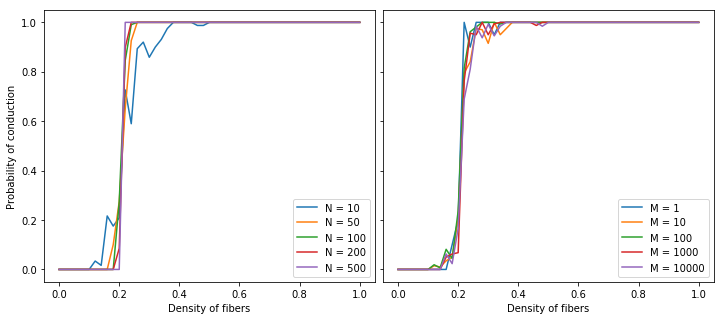

In [76]:
# Plot probability as a function of density for each N
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5), sharey=True)
fig.subplots_adjust(wspace=0.025)

legend1 = []
grouped_df = df.groupby(['N','d']).mean().reset_index()
for indexN,i in enumerate(df.N.unique()):
    subdf_PerN = grouped_df[grouped_df['N'] == i]
    ax1.plot(subdf_PerN.d, subdf_PerN.Probability)
    legend1.append('N = {}'.format(df.N.unique()[indexN]))
    

# Plot probability as a function of density for each M
legend2 = []
grouped_df = df.groupby(['M','d']).mean().reset_index()
for index,i in enumerate(df.M.unique()):
    subdf_perM = grouped_df[grouped_df['M'] == i]
    ax2.plot(subdf_perM.d, subdf_perM.Probability)
    legend2.append('M = {}'.format(df.M.unique()[index]))
    
ax1.set(ylabel="Probability of conduction",xlabel="Density of fibers")
ax2.set(xlabel="Density of fibers")
ax1.legend(legend1, loc  ='lower right')
ax2.legend(legend2, loc  ='lower right')



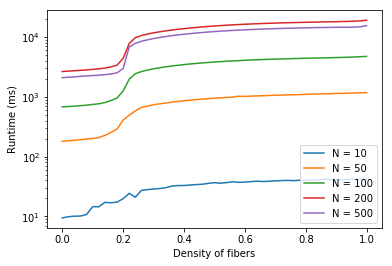

In [4]:
# Plot average time as a function of density
legend = []
grouped_df = df.groupby(['N','d']).mean().reset_index()
for index,i in enumerate(df.N.unique()):
    subdf_perN = grouped_df[grouped_df['N'] == i]
    plt.plot(subdf_perN.d, subdf_perN.AvgTime)
    legend.append('N = {}'.format(df.N.unique()[index]))
plt.ylabel("Runtime (ms)")
plt.xlabel("Density of fibers")
plt.yscale("log")
plt.legend(legend, loc  ='lower right')
plt.show()

10 31.521568627450982
50 813.5803921568628
100 3243.7107843137255
200 12933.999019607843
500 10403.04044117647


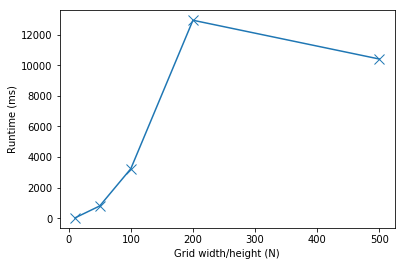

In [79]:
# Plot average time as a function of grid size N
meanTimePerN = []
for index,i in enumerate(df.N.unique()):
    meanTimePerN.append(df[df['N'] == i].AvgTime.mean())
    print(i,df[df['N'] == i].AvgTime.mean() )
meanTime = [x for y, x in sorted(zip(df.N.unique(), meanTimePerN))]
plt.plot(sorted(df.N.unique()), meanTime, marker='x',markersize=10)
plt.ylabel("Runtime (ms)")
plt.xlabel("Grid width/height (N)")
plt.show()

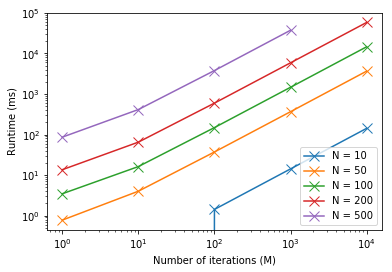

In [84]:
# Plot average time of different M iterations, for each N
legend = []
grouped_df = df.groupby(['N','M']).mean().reset_index()
for indexN,i in enumerate(df.N.unique()):
    subdf_PerN = grouped_df[grouped_df['N'] == i]  
    plt.plot(sorted(subdf_PerN.M), sorted(subdf_PerN.AvgTime), marker='x',markersize=10)
    legend.append('N = {}'.format(df.N.unique()[indexN]))
    
plt.ylabel("Runtime (ms)")
plt.xlabel("Number of iterations (M)")
plt.yscale("log")
plt.xscale("log")
plt.legend(legend, loc  ='lower right')
plt.show()

[1.0, 1.5113184551095287, 2.9405915531368927, 5.621105337115261]
[1, 2, 4, 8]


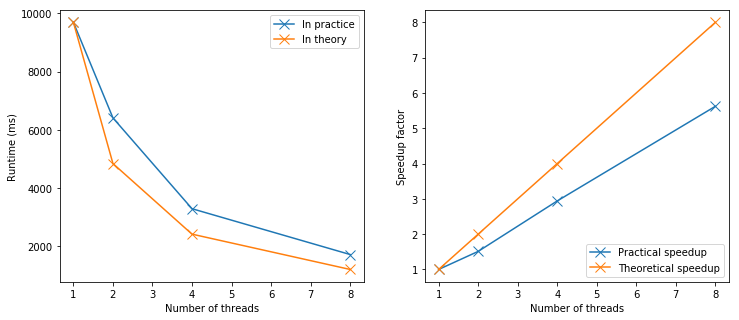

In [86]:
# Plot average time as a function of thread number
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

meanTimePerNbThreads = []
theoreticalMeanTime = []
for index,i in enumerate(df.NbThreads.unique()):
    meanTimePerNbThreads.append(df[df['NbThreads'] == i].AvgTime.mean())
# plt.scatter(df.N.unique(), meanTimePerN, marker='x')
meanTime = [x for y, x in sorted(zip(df.NbThreads.unique(), meanTimePerNbThreads))]
nbThreads = sorted(df.NbThreads.unique())
ax1.plot(nbThreads, meanTime, marker='x',markersize=10)

for i in df.NbThreads.unique():
    theoreticalMeanTime.append(meanTime[0]/i)
    
ax1.plot(nbThreads, theoreticalMeanTime, marker='x',markersize=10)
ax1.set(ylabel="Runtime (ms)",xlabel="Number of threads")
ax1.legend(["In practice","In theory"],loc='best')

# Plot speedup factor as a function of thread number
speedUp = []
theoreticalSpeedUp = []
for i in range(0,len(meanTime)):
    speedUp.append(meanTime[0]/meanTime[i])
    theoreticalSpeedUp.append(meanTime[0]/meanTime[i])
print(speedUp)
print(nbThreads)
ax2.plot(nbThreads, speedUp, marker='x',markersize=10)
ax2.plot(nbThreads, nbThreads, marker='x',markersize=10)
ax2.set(ylabel="Speedup factor", xlabel="Number of threads")
ax2.legend(["Practical speedup", "Theoretical speedup"], loc  ='lower right')



[1.0, 1.5113184551095287, 2.9405915531368927, 5.621105337115261]
[1, 2, 4, 8]


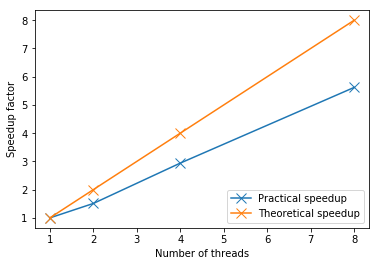

In [9]:
schedule_df = pd.read_csv("Results/schedule_results/merged.txt", delimiter=' ')
#print(schedule_df[:5])
print(schedule_df.shape)
print(schedule_df.columns)
print(schedule_df.NbThreads.unique())
print(schedule_df.Schedule_kind.unique())
print(schedule_df.Chunk_size.unique())

(1408, 9)
Index(['Flag', 'N', 'd', 'M', 'NbThreads', 'AvgTime', 'Schedule_kind',
       'Chunk_size', 'Probability'],
      dtype='object')
[1 2 4 8]
['auto' 'dynamic' 'guided' 'static']
[1000  128    1  256    2    4  512    8  500   64  250   32  125   16]


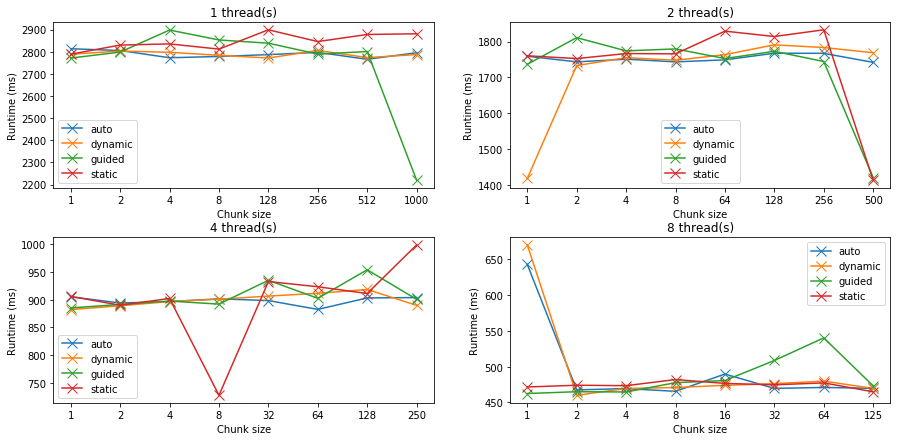

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [53]:
legend = []
grouped_df = schedule_df.groupby(["Schedule_kind","Chunk_size","NbThreads"]).mean().reset_index()
#print(grouped_df)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(15,7))
axs = [ax1, ax2, ax3, ax4]
fig.subplots_adjust(hspace=0.3)
for index_thread, t in enumerate(schedule_df.NbThreads.unique()):
    subdf_perThreads = grouped_df[grouped_df['NbThreads'] == t]
    #print(subdf_perThreads)
    plt.figure(figsize=(20,10))

    for index_chunk,i in enumerate(subdf_perThreads.Schedule_kind.unique()):
        subdf_PerSchedule_kind = subdf_perThreads[subdf_perThreads['Schedule_kind'] == i]
        meanTime = [x for y, x in sorted(zip(subdf_PerSchedule_kind.Chunk_size, subdf_PerSchedule_kind.AvgTime))]
        
        chunks = sorted(subdf_PerSchedule_kind.Chunk_size)
        x_points = np.linspace(chunks[0],chunks[-1],len(chunks))
        axs[index_thread].plot(x_points, meanTime, marker='x',markersize=10)

        axs[index_thread].xaxis.set_ticks(x_points) #evenly space xticks
        axs[index_thread].xaxis.set_ticklabels(chunks) # change the ticks' names to chunksize
        legend.append('{}'.format(schedule_df.Schedule_kind.unique()[index_chunk]))
    
for index,ax in enumerate(axs):
    ax.set(xlabel='Chunk size', ylabel='Runtime (ms)')
    ax.legend(legend, loc='best')
    ax.set_title("{} thread(s)".format(schedule_df.NbThreads.unique()[index]))



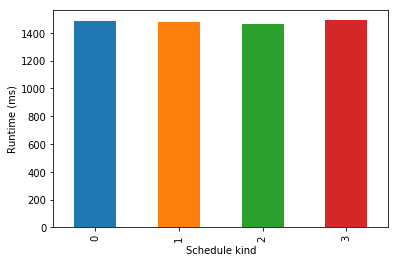

In [11]:
plot = schedule_df.groupby(["Schedule_kind"]).mean().reset_index()['AvgTime'].plot(kind='bar')
plt.ylabel("Runtime (ms)")
plt.xlabel("Schedule kind")
plt.show()